### ESBM for recommender systems

LAST FULL FUN 23/04 9:20

In [159]:
#!uv pip install -q --system numba-cuda==0.4.0

In [160]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from collections import Counter
from collections import OrderedDict
from scipy.special import gamma
import scipy.special as sc
import numba as nb
from scipy.special import gammaln
import time
import seaborn as sns
from math import lgamma
from numba import cuda
from scipy.stats import mode
from functs2 import *
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

In [161]:
import warnings
warnings.filterwarnings("ignore", message="KMeans is known to have a memory leak on Windows")

In [162]:
# from numba import config
# config.CUDA_ENABLE_PYNVJITLINK = 1

### Load data

In [163]:
# ants on rows, plants on columns
dataset = pd.read_csv('life_sciences_data/pollinators/M_PL_060_01.csv')
dataset2 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_02.csv')
dataset3 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_03.csv')
dataset4 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_04.csv')
dataset5 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_05.csv')
dataset6 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_06.csv')
dataset7 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_07.csv')
dataset8 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_08.csv')
dataset9 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_09.csv')
dataset10 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_10.csv')
dataset11 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_11.csv')
dataset12 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_12.csv')
dataset13 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_13.csv')
dataset14 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_14.csv')
dataset15 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_15.csv')
dataset16 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_16.csv')
dataset17 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_17.csv')
dataset18 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_18.csv')
dataset19 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_19.csv')
dataset20 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_20.csv')
dataset21 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_21.csv')
dataset22 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_22.csv')
dataset23 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_23.csv')
dataset24 = pd.read_csv('life_sciences_data/pollinators/M_PL_060_24.csv')

In [164]:
dataset.index = dataset['Unnamed: 0']
dataset = dataset.drop(columns=['Unnamed: 0'])
dataset2.index = dataset2['Unnamed: 0']
dataset2 = dataset2.drop(columns=['Unnamed: 0'])
dataset3.index = dataset3['Unnamed: 0']
dataset3 = dataset3.drop(columns=['Unnamed: 0'])
dataset4.index = dataset4['Unnamed: 0']
dataset4 = dataset4.drop(columns=['Unnamed: 0'])
dataset5.index = dataset5['Unnamed: 0']
dataset5 = dataset5.drop(columns=['Unnamed: 0'])
dataset6.index = dataset6['Unnamed: 0']
dataset6 = dataset6.drop(columns=['Unnamed: 0'])
dataset7.index = dataset7['Unnamed: 0']
dataset7 = dataset7.drop(columns=['Unnamed: 0'])
dataset8.index = dataset8['Unnamed: 0']
dataset8 = dataset8.drop(columns=['Unnamed: 0'])
dataset9.index = dataset9['Unnamed: 0']
dataset9 = dataset9.drop(columns=['Unnamed: 0'])
dataset10.index = dataset10['Unnamed: 0']
dataset10 = dataset10.drop(columns=['Unnamed: 0'])
dataset11.index = dataset11['Unnamed: 0']
dataset11 = dataset11.drop(columns=['Unnamed: 0'])
dataset12.index = dataset12['Unnamed: 0']
dataset12 = dataset12.drop(columns=['Unnamed: 0'])
dataset13.index = dataset13['Unnamed: 0']
dataset13 = dataset13.drop(columns=['Unnamed: 0'])
dataset14.index = dataset14['Unnamed: 0']
dataset14 = dataset14.drop(columns=['Unnamed: 0'])
dataset15.index = dataset15['Unnamed: 0']
dataset15 = dataset15.drop(columns=['Unnamed: 0'])
dataset16.index = dataset16['Unnamed: 0']
dataset16 = dataset16.drop(columns=['Unnamed: 0'])
dataset17.index = dataset17['Unnamed: 0']
dataset17 = dataset17.drop(columns=['Unnamed: 0'])
dataset18.index = dataset18['Unnamed: 0']
dataset18 = dataset18.drop(columns=['Unnamed: 0'])
dataset19.index = dataset19['Unnamed: 0']
dataset19 = dataset19.drop(columns=['Unnamed: 0'])
dataset20.index = dataset20['Unnamed: 0']
dataset20 = dataset20.drop(columns=['Unnamed: 0'])
dataset21.index = dataset21['Unnamed: 0']
dataset21 = dataset21.drop(columns=['Unnamed: 0'])
dataset22.index = dataset22['Unnamed: 0']
dataset22 = dataset22.drop(columns=['Unnamed: 0'])
dataset23.index = dataset23['Unnamed: 0']
dataset23 = dataset23.drop(columns=['Unnamed: 0'])
dataset24.index = dataset24['Unnamed: 0']
dataset24 = dataset24.drop(columns=['Unnamed: 0'])

In [165]:
import re

def clean_column(col):
    return re.sub(r'\s*M_PL.*', '', col)

# Rename columns using the function
dataset.columns = [clean_column(col) for col in dataset.columns]
dataset2.columns = [clean_column(col) for col in dataset2.columns]
dataset3.columns = [clean_column(col) for col in dataset3.columns]
dataset4.columns = [clean_column(col) for col in dataset4.columns]
dataset5.columns = [clean_column(col) for col in dataset5.columns]
dataset6.columns = [clean_column(col) for col in dataset6.columns]
dataset7.columns = [clean_column(col) for col in dataset7.columns]
dataset8.columns = [clean_column(col) for col in dataset8.columns]
dataset9.columns = [clean_column(col) for col in dataset9.columns]
dataset10.columns = [clean_column(col) for col in dataset10.columns]
dataset11.columns = [clean_column(col) for col in dataset11.columns]
dataset12.columns = [clean_column(col) for col in dataset12.columns]
dataset13.columns = [clean_column(col) for col in dataset13.columns]
dataset14.columns = [clean_column(col) for col in dataset14.columns]
dataset15.columns = [clean_column(col) for col in dataset15.columns]
dataset16.columns = [clean_column(col) for col in dataset16.columns]
dataset17.columns = [clean_column(col) for col in dataset17.columns]
dataset18.columns = [clean_column(col) for col in dataset18.columns]
dataset19.columns = [clean_column(col) for col in dataset19.columns]
dataset20.columns = [clean_column(col) for col in dataset20.columns]
dataset21.columns = [clean_column(col) for col in dataset21.columns]
dataset22.columns = [clean_column(col) for col in dataset22.columns]
dataset23.columns = [clean_column(col) for col in dataset23.columns]
dataset24.columns = [clean_column(col) for col in dataset24.columns]

dataset.index = [clean_column(col) for col in dataset.index]
dataset2.index = [clean_column(col) for col in dataset2.index]
dataset3.index = [clean_column(col) for col in dataset3.index]
dataset4.index = [clean_column(col) for col in dataset4.index]
dataset5.index = [clean_column(col) for col in dataset5.index]
dataset6.index = [clean_column(col) for col in dataset6.index]
dataset7.index = [clean_column(col) for col in dataset7.index]
dataset8.index = [clean_column(col) for col in dataset8.index]
dataset9.index = [clean_column(col) for col in dataset9.index]
dataset10.index = [clean_column(col) for col in dataset10.index]
dataset11.index = [clean_column(col) for col in dataset11.index]
dataset12.index = [clean_column(col) for col in dataset12.index]
dataset13.index = [clean_column(col) for col in dataset13.index]
dataset14.index = [clean_column(col) for col in dataset14.index]
dataset15.index = [clean_column(col) for col in dataset15.index]
dataset16.index = [clean_column(col) for col in dataset16.index]
dataset17.index = [clean_column(col) for col in dataset17.index]
dataset18.index = [clean_column(col) for col in dataset18.index]
dataset19.index = [clean_column(col) for col in dataset19.index]
dataset20.index = [clean_column(col) for col in dataset20.index]
dataset21.index = [clean_column(col) for col in dataset21.index]
dataset22.index = [clean_column(col) for col in dataset22.index]
dataset23.index = [clean_column(col) for col in dataset23.index]
dataset24.index = [clean_column(col) for col in dataset24.index]

In [166]:
dataset = dataset.astype(float)
dataset2 = dataset2.astype(float)
dataset3 = dataset3.astype(float)
dataset4 = dataset4.astype(float)
dataset5 = dataset5.astype(float)
dataset6 = dataset6.astype(float)
dataset7 = dataset7.astype(float)
dataset8 = dataset8.astype(float)
dataset9 = dataset9.astype(float)
dataset10 = dataset10.astype(float)
dataset11 = dataset11.astype(float)
dataset12 = dataset12.astype(float)
dataset13 = dataset13.astype(float)
dataset14 = dataset14.astype(float)
dataset15 = dataset15.astype(float)
dataset16 = dataset16.astype(float)
dataset17 = dataset17.astype(float)
dataset18 = dataset18.astype(float)
dataset19 = dataset19.astype(float)
dataset20 = dataset20.astype(float)
dataset21 = dataset21.astype(float)
dataset22 = dataset22.astype(float)
dataset23 = dataset23.astype(float)
dataset24 = dataset24.astype(float)

In [167]:
dataset_full = dataset.add(dataset2, fill_value=0).add(dataset3, fill_value=0).add(dataset4, fill_value=0).add(dataset5, fill_value=0).add(dataset6, fill_value=0).add(dataset7, fill_value=0).add(dataset8, fill_value=0).add(dataset9, fill_value=0).add(dataset10, fill_value=0).add(dataset11, fill_value=0).add(dataset12, fill_value=0).add(dataset13, fill_value=0).add(dataset14, fill_value=0).add(dataset15, fill_value=0).add(dataset16, fill_value=0).add(dataset17, fill_value=0).add(dataset18, fill_value=0).add(dataset19, fill_value=0).add(dataset20, fill_value=0).add(dataset21, fill_value=0).add(dataset22, fill_value=0).add(dataset23, fill_value=0).add(dataset24, fill_value=0)

In [168]:
dataset_full = dataset_full.fillna(0)

In [169]:
dataset_full.drop(columns=['Unidentified sp1','Unidentified sp7'], inplace=True)

In [170]:
# for x in num_sampled.keys():
#     dataset.loc[x] = dataset.loc[x] / int(num_sampled[x])

In [171]:
# dataset = dataset.drop(index=dataset[dataset['Abundance']=='0'].index, inplace=False)
# dataset.reset_index(drop=True, inplace=True)

# abundance_ants = dataset['Abundance'].copy()
# abundance_plants = dataset.iloc[0].copy()
# abundance_plants = abundance_plants[1:].to_dict()
# dataset.index = dataset['Unnamed: 0']
# dataset = dataset.drop(columns=['Unnamed: 0', 'Num. of hosts sampled'])
# dataset_clean = dataset.drop(columns=['Abundance', 'Unnamed: 0'])
# dataset_clean = dataset_clean.drop(index=['Abundance"'])

# for x in dataset_clean.columns:
#     dataset_clean[x] = dataset_clean[x]/ abundance_plants[x]
    
# for x in range(1, len(dataset_clean)):
#     dataset_clean.iloc[x] = dataset_clean.iloc[x]/ int(abundance_ants[x])

In [172]:
dataset_clean = dataset_full.copy()

In [173]:
matrix_form = dataset_clean.to_numpy()

In [371]:
matrix_form[matrix_form>100]=100

<Axes: >

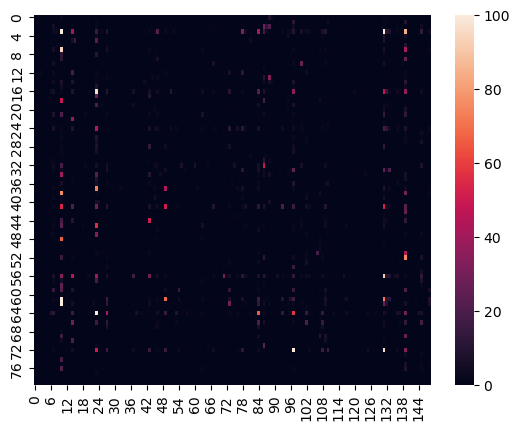

In [373]:
sns.heatmap(matrix_form)

### Generate validation set

In [374]:
def generate_val_set(y, size=0.1, seed=42, only_observed=True):
    np.random.seed(seed)
    n_users, n_items = y.shape
    n_val = int(size*n_users*n_items)
    y_val = []
    for _ in range(n_val):
        u = np.random.randint(n_users)
        i = np.random.randint(n_items)
        if only_observed:
            while y[u,i] == 0:
                u = np.random.randint(n_users)
                i = np.random.randint(n_items)
        y_val.append((u,i, int(y[u,i])))
    
    y_train = y.copy()
    for u,i, _ in y_val:
        y_train[u,i] = 0
    
    return y_train, y_val

In [375]:
import numpy as np
from scipy.special import gammaln

def expected_cl_py(n, sigma, theta, H):
    n = int(n)
    if not (0 <= sigma < 1 and theta > -sigma and n > 0 and H > 1):
        raise ValueError("Invalid input: ensure 0 <= sigma < 1, theta > -sigma, n > 0, H > 1")

    if np.isinf(H):
        if sigma == 0:
            out = theta * np.sum(1 / (theta - 1 + np.arange(1, n + 1)))
        else:
            out = (1 / sigma) * np.exp(
                gammaln(theta + sigma + n) - gammaln(theta + sigma) -
                gammaln(theta + n) + gammaln(theta + 1)
            ) - theta / sigma
    else:
        if sigma == 0:
            index = np.arange(n)
            out = H - H * np.exp(np.sum(
                np.log(index + theta * (1 - 1/H)) - np.log(theta + index)
            ))
        else:
            raise NotImplementedError("Case with finite H and sigma > 0 is not implemented in the original R function.")
    
    return out

def HGnedin(V, h, gamma=0.5):
    return np.exp(
        gammaln(V + 1) - gammaln(h + 1) - gammaln(V - h + 1)
        + gammaln(h - gamma) - gammaln(1 - gamma)
        + np.log(gamma)
        + gammaln(V + gamma - h) - gammaln(V + gamma))

In [376]:
Y_train, y_val = generate_val_set(matrix_form, size=0, seed=42, only_observed=False)

In [377]:
# np.save('Y_train_books.npy', Y_train)
# np.save('y_val_books.npy', y_val)

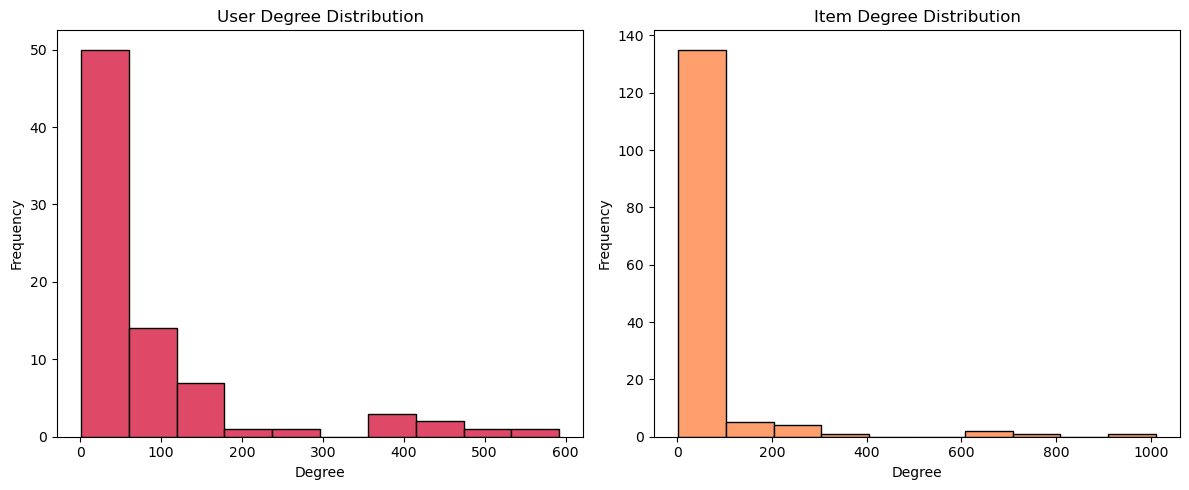

In [378]:
user_degrees = Y_train.sum(axis=1)
item_degrees = Y_train.sum(axis=0)

# Choose colors from magma colormap
cmap = plt.cm.magma
user_color = cmap(0.6)  # a lighter magma color
item_color = cmap(0.8)  # a darker magma color

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot user degree distribution
axes[0].hist(user_degrees, bins=10, color=user_color, edgecolor='black')
axes[0].set_title("User Degree Distribution")
axes[0].set_xlabel("Degree")
axes[0].set_ylabel("Frequency")

# Plot item degree distribution
axes[1].hist(item_degrees, bins=10, color=item_color, edgecolor='black')
axes[1].set_title("Item Degree Distribution")
axes[1].set_xlabel("Degree")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [379]:
def validate_models(Y_train, Y_val, model_list, param_list, n_iters=500, burn_in=None, verbose=0,
                    thinning=3, model_names=None, true_users=None, true_items=None, k=None,
                    print_intermid=False, threshold_relevant=1, compute_metrics=True):
    if burn_in is None:
        burn_in = n_iters//2
    
    Y_val_pairs = [(u,i) for u,i,_ in Y_val]
    Y_val_users = [u for u,_,_ in Y_val]
    Y_val_items = [i for _,i,_ in Y_val]
    Y_val_ratings = [r for _,_,r in Y_val]
    
    
    val_users_relevant = {}

    for j in range(len(Y_val_pairs)):
        u = Y_val_users[j]
        i = Y_val_items[j]
        r = Y_val_ratings[j]
        if u not in val_users_relevant:
            val_users_relevant[u] = [] 
        if r >= threshold_relevant:
            val_users_relevant[u].append(i)
    
    val_users_unique = list(val_users_relevant.keys())
    
    model_list_out = []
    
    for i in range(len(model_list)):
        if model_names is not None:
            name = model_names[i]
        else:
            name = i
            
        print('\nModel name:', name)
            
        model_type = model_list[i]
        params = param_list[i]
        model = model_type(Y=Y_train, num_users=Y_train.shape[0], num_items=Y_train.shape[1], **params)
        print('Starting training for model', name)
        llk_model, user_cl_model, item_cl_model = model.gibbs_train(n_iters, verbose=verbose)
        model_est_users, model_est_items, model_vi_users, model_vi_items = model.estimate_cluster_assignment_vi(burn_in=burn_in, thinning=thinning)
        
        waic_model = None
        precision_model = None
        recall_model = None
        mae_model = None
        mse_model = None
        llk_edges = []
        
        # print('Starting waic computation', name)        
        # for iter in range(burn_in, model.n_iters, thinning):
        #      llk_edges.append(model.compute_llk(iter))
        # waic_model = waic_calculation(np.array(llk_edges))
        
        if compute_metrics is True:
            print('Starting prediction for model', name)
            model_ratings = model.point_predict(Y_val_pairs, seed=42)
            mae_model = mean_absolute_error(Y_val_ratings, model_ratings)
            mse_model = mean_squared_error(Y_val_ratings, model_ratings)    
            
            print('Starting ranking for model', name)
            if k is None:
                ranks_model = model.predict_with_ranking(val_users_unique)
            else:
                ranks_model = model.predict_k(val_users_unique, k=k)
                
            precision_list_model = []   
            recall_list_model = []
            for j in range(len(val_users_unique)):
                if len(val_users_relevant[val_users_unique[j]]) == 0:
                    continue
                precision_list_model.append(compute_precision(val_users_relevant[val_users_unique[j]], ranks_model[j]))
                recall_list_model.append(compute_recall(val_users_relevant[val_users_unique[j]], ranks_model[j]))
            precision_model = sum(precision_list_model)/len(precision_list_model)
            recall_model = sum(recall_list_model)/len(recall_list_model)
        
        if true_users is not None:
            vi_users_model = VI(true_users, model.user_clustering)[0]
            model.vi_users = vi_users_model
        if true_items is not None:
            vi_items_model = VI(true_items, model.item_clustering)[0]
            model.vi_items = vi_items_model
        
        model.precision_ranks = precision_model
        model.recall_ranks = recall_model
        model.mae = mae_model
        model.mse = mse_model
        model.waic = waic_model
        model.llk_edges = llk_edges
        
        if print_intermid is True:
            print('MAE:', mae_model)
            print('MSE:', mse_model)
            print('Precision:', precision_model)
            print('Recall:', recall_model)
            if true_users is not None:
                print('VI users:', vi_users_model)
            if true_items is not None:
                print('VI items:', vi_items_model)
            if waic_model is not None:
                print('WAIC:', waic_model)
        
        model_list_out.append(model)
        
    return model_list_out

In [380]:
Y_val_pairs = [(u,i) for u,i,_ in y_val]
Y_val_users = [u for u,_,_ in y_val]
Y_val_items = [i for _,i,_ in y_val]
Y_val_ratings = [r for _,_,r in y_val]


val_users_relevant = {}

for j in range(len(Y_val_pairs)):
    u = Y_val_users[j]
    i = Y_val_items[j]
    r = Y_val_ratings[j]
    if u not in val_users_relevant:
        val_users_relevant[u] = [] 
    if r > 1:
        val_users_relevant[u].append(i)

val_users_unique = list(val_users_relevant.keys())

## Degree-corrected models

In [381]:
V = Y_train.shape[0]
alpha_dp = 0.45
alpha_py = -0.19
sigma_py = 0.34
gamma_gn = 0.7
np.round(expected_cl_py(V, 0, alpha_dp, np.inf), 2), np.round(expected_cl_py(V, sigma_py, alpha_py, np.inf), 2), round(np.sum(np.arange(1, V + 1) * HGnedin(V, np.arange(1, V + 1), gamma_gn)))

(np.float64(2.98), np.float64(2.97), 3)

In [382]:
V = Y_train.shape[1]
alpha_dp = 0.45
alpha_py = -0.19
sigma_py = 0.34
gamma_gn = 0.7
np.round(expected_cl_py(V, 0, alpha_dp, np.inf), 2), np.round(expected_cl_py(V, sigma_py, alpha_py, np.inf), 2), round(np.sum(np.arange(1, V + 1) * HGnedin(V, np.arange(1, V + 1), gamma_gn)))

(np.float64(3.26), np.float64(3.54), 4)

In [445]:
params_baseline = {'scheme_type':'DP', 'cov_users':None,'cov_items':None, 'prior_a':1, 'prior_b':1, 'seed':42, 'bar_h_users':2, 'bar_h_items':3,
           'scheme_param':1, 'gamma':0.1, 'epsilon':1e-10, 'sigma':0.7, 'alpha_c':[1.5, 1.5, 1.5, 1.5], 'user_clustering':'random', 'item_clustering':'random',}

params_dp_esbm = params_baseline.copy()
params_dp_esbm['prior_a'] = 1
params_dp_esbm['prior_b'] = 1
params_dp_esbm['scheme_param'] = 0.45
params_dp_esbm['scheme_type'] = 'DP'

params_dp_dc = params_dp_esbm.copy()
params_dp_dc['degree_param_users'] = 100000
params_dp_dc['degree_param_items'] = 100000

params_py_esbm = params_baseline.copy()
params_py_esbm['prior_a'] = 1
params_py_esbm['prior_b'] = 1
params_py_esbm['scheme_param'] = -0.19
params_py_esbm['sigma'] = 0.34
params_py_esbm['scheme_type'] = 'PY'

params_py_dc = params_py_esbm.copy()
params_py_dc['degree_param_users'] = 1
params_py_dc['degree_param_items'] = 1

params_gn_esbm = params_baseline.copy()
params_gn_esbm['prior_a'] = 1
params_gn_esbm['prior_b'] = 1
params_gn_esbm['gamma'] = 0.7
params_gn_esbm['scheme_type'] = 'GN'

params_gn_dc = params_gn_esbm.copy()
params_gn_dc['degree_param_users'] = 1
params_gn_dc['degree_param_items'] = 1

model_list = [dcesbm]#, esbm, esbm, dcesbm, esbm, dcesbm]
params_list = [params_dp_esbm]#, params_dp_esbm, params_py_esbm, params_py_dc, params_gn_esbm, params_gn_dc]
model_names = ['DP-dc']#, 'DP-esbm', 'PY-ESBM', 'PY-DC', 'GN-ESBM', 'GN-DC']

In [446]:
burn_in = 1000
thinning = 1
n_iters = 3000
k = 10

In [447]:
out_models_dc = validate_models(Y_train.copy(), [(0, 0, 0)], model_list, params_list, n_iters=n_iters, burn_in=burn_in, k = k,verbose=1,
                                 thinning=thinning, model_names=model_names, print_intermid=True, compute_metrics=False,)


Model name: DP-dc
initialsing user clusters random
initialising item clusters random
Starting training for model DP-dc
starting log likelihood 5196.5510801798255
0 6500.033885722307
time 0.029586076736450195
300 9257.948949628784
time 18.69935703277588
600 9290.167724665394
time 18.278230667114258
900 9265.256949236393
time 18.067296028137207
1200 9279.638005833742
time 18.12415838241577
1500 9270.08031811742
time 17.98052406311035
1800 9267.97017429282
time 18.221387147903442
2100 9267.130524992966
time 18.081212997436523
2400 9274.03494096566
time 18.06491446495056
2700 9279.42238731056
time 18.015681266784668
end llk:  9266.583521540011
MAE: None
MSE: None
Precision: None
Recall: None


In [448]:
model_dp_dc = out_models_dc[0]

In [432]:
model_dp_dc.estimate_cluster_assignment_vi(burn_in=burn_in, thinning=thinning)

(array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 4, 0, 0, 0, 0, 0, 0, 5,
        3, 1, 0, 0, 0, 0, 6, 0, 0, 0, 0, 7, 0, 0, 1, 8, 0, 0, 0, 0, 0, 0,
        9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0,  0,  1,  0,  0,  0,  2,  3,  0,  4,  0,  0,  0,  5,  1,  6,  5,
         0,  2,  4,  2,  0,  7,  2,  8,  5,  0,  0,  0,  2,  4,  0,  9,  0,
        10,  8,  0, 11,  0,  0,  0,  1,  4,  8,  4, 12, 12,  8,  0,  9,  0,
         7, 13,  0, 14,  4,  0,  0,  0,  0,  4,  9,  0,  3,  0,  4,  0, 15,
        16,  1,  0, 11, 13,  7,  0,  4,  2,  0, 16, 13, 16,  6,  2,  0,  0,
         4,  4,  4,  4,  4,  2, 11,  0,  9, 13, 12,  0, 10,  0,  2, 15,  4,
        17, 13,  0,  0,  5,  0, 17, 14, 10,  2,  0,  0,  0,  4,  0,  0,  4,
         2,  2,  0, 13,  0,  4, 10,  0,  0,  5, 10,  0, 13,  7, 16,  4, 13,
         0,  0,  0,  5,  0,  0,  4,  0,  0, 18,  4,  0, 14]),
 np.float64(3.18605411059616),
 np.float64(2.07115600925

In [449]:
model_dp_dc.n_clusters_users, model_dp_dc.n_clusters_items

(10, 19)

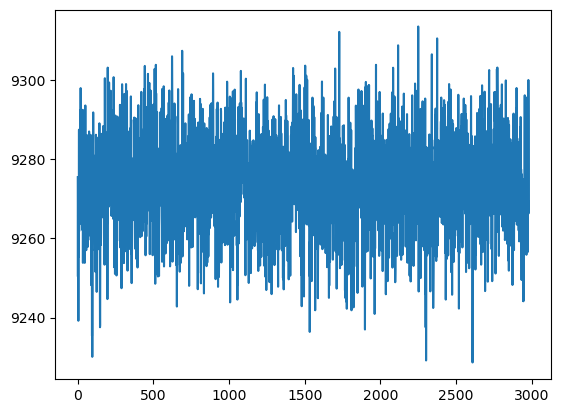

In [429]:
plt.plot(model_dp_dc.train_llk[20:], label='Training LLK')

In [389]:
model_dp_esbm = out_models_dc[1]
model_dp_dc = out_models_dc[0]
model_py_esbm = out_models_dc[2]
model_py_dc = out_models_dc[3]
model_gn_esbm = out_models_dc[4]
model_gn_dc = out_models_dc[5]

IndexError: list index out of range

In [ ]:
print('DP-ESBM:', model_dp_esbm.waic)
print('DP-DC:', model_dp_dc.waic)
print('PY-ESBM:', model_py_esbm.waic)
print('PY-DC:', model_py_dc.waic)
print('GN-ESBM:', model_gn_esbm.waic)
print('GN-DC:', model_gn_dc.waic)

DP-ESBM: 13263.206223860197
DP-DC: 9871.999394921992
PY-ESBM: 12938.395890794367
PY-DC: 10227.6894232179
GN-ESBM: 13205.317174155532
GN-DC: 10262.22814519289


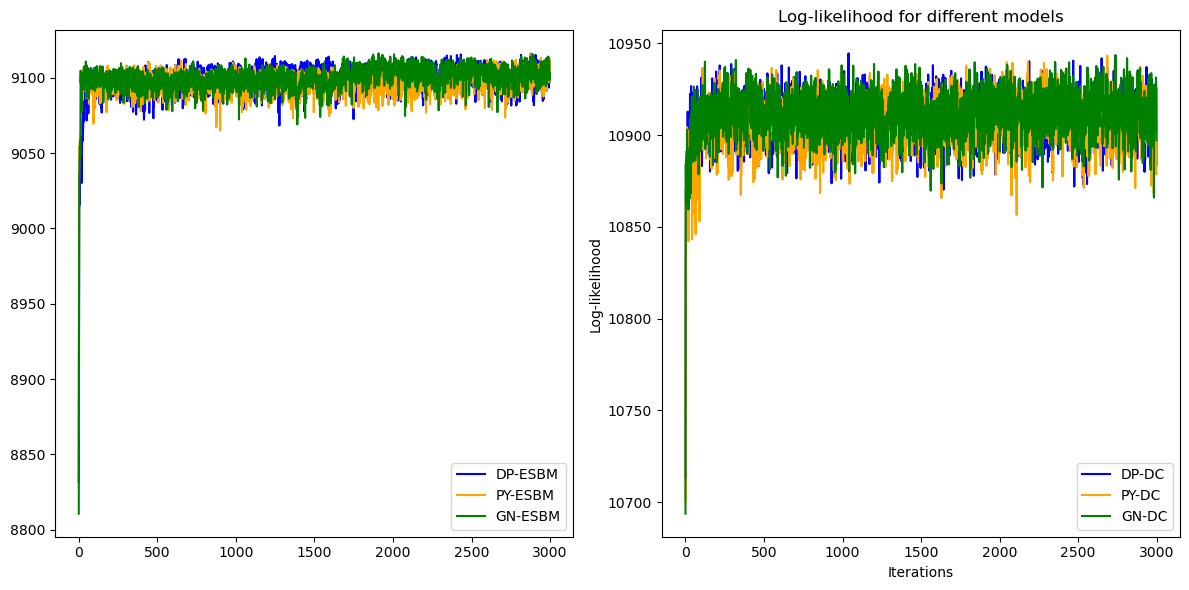

In [ ]:
llk_dp_esbm = model_dp_esbm.train_llk
llk_dp_dc = model_dp_dc.train_llk
llk_py_esbm = model_py_esbm.train_llk
llk_py_dc = model_py_dc.train_llk
llk_gn_esbm = model_gn_esbm.train_llk
llk_gn_dc = model_gn_dc.train_llk


fig, ax = plt.subplots(1, 2, figsize=(12, 6))

ax[0].plot(llk_dp_esbm[2:], label='DP-ESBM', color='blue')
ax[0].plot(llk_py_esbm[2:], label='PY-ESBM', color='orange')
ax[0].plot(llk_gn_esbm[2:], label='GN-ESBM', color='green')
ax[0].legend()

ax[1].plot(llk_dp_dc[2:], label='DP-DC', color='blue')
ax[1].plot(llk_py_dc[2:], label='PY-DC', color='orange')
ax[1].plot(llk_gn_dc[2:], label='GN-DC', color='green')
ax[1].legend()


plt.title('Log-likelihood for different models')
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')

plt.tight_layout()
plt.show()

In [ ]:
print(f'n clusters dp esbm: {model_dp_esbm.n_clusters_users}, {model_dp_esbm.n_clusters_items}')
print(f'n clusters dp dc: {model_dp_dc.n_clusters_users}, {model_dp_dc.n_clusters_items}')
print(f'n clusters py esbm: {model_py_esbm.n_clusters_users}, {model_py_esbm.n_clusters_items}')
print(f'n clusters py dc: {model_py_dc.n_clusters_users}, {model_py_dc.n_clusters_items}')
print(f'n clusters gn esbm: {model_gn_esbm.n_clusters_users}, {model_gn_esbm.n_clusters_items}')
print(f'n clusters gn dc: {model_gn_dc.n_clusters_users}, {model_gn_dc.n_clusters_items}')

n clusters dp esbm: 10, 19
n clusters dp dc: 10, 19
n clusters py esbm: 10, 19
n clusters py dc: 10, 19
n clusters gn esbm: 10, 19
n clusters gn dc: 10, 19


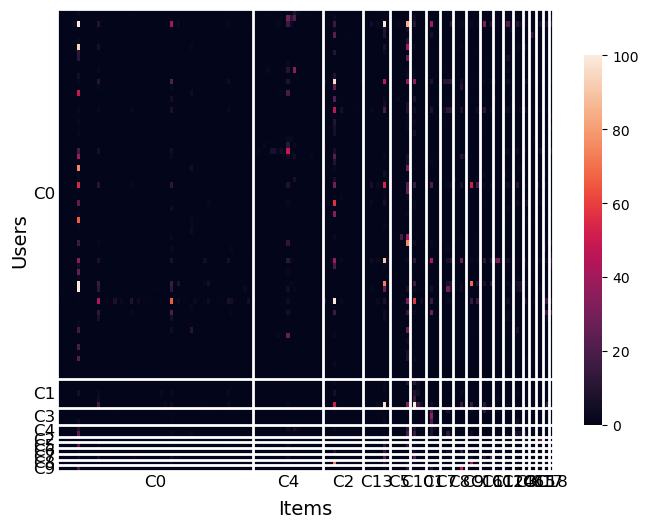

In [450]:
plot_heatmap(model_dp_dc, size=(8,6), capped=100)#, plot_heatmap(model_py_esbm, size=(8,6))#, plot_heatmap(model_gn_dc, size=(8,6))

In [435]:
def circular_partitioned_layout(nodes_sorted_by_cluster, cluster_dict, total_angle, start_angle=0.0, gap=0.05):
    """
    Returns positions for nodes grouped by cluster with gaps between clusters.
    - nodes_sorted_by_cluster: list of nodes (sorted by cluster)
    - cluster_dict: dict mapping node → cluster_id
    - total_angle: span of arc (e.g., π or 2π)
    - start_angle: angle to start layout from
    - gap: angular gap between clusters (in radians)
    """
    from collections import defaultdict

    # Group nodes by cluster
    clusters = defaultdict(list)
    for node in nodes_sorted_by_cluster:
        clusters[cluster_dict[node]].append(node)

    cluster_ids = sorted(clusters.keys())
    n_clusters = len(cluster_ids)

    total_nodes = sum(len(clusters[c]) for c in cluster_ids)
    total_gap = gap * (n_clusters - 1)
    total_arc = total_angle - total_gap

    pos = {}
    angle = start_angle
    for c in cluster_ids:
        nodes = clusters[c]
        arc = total_arc * (len(nodes) / total_nodes)
        thetas = np.linspace(angle, angle + arc, len(nodes), endpoint=False)
        for node, theta in zip(nodes, thetas):
            pos[node] = (np.cos(theta), np.sin(theta))
        angle += arc + gap
    return pos

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import networkx as nx
from collections import defaultdict

# Function to assign positions and draw community wedges
def circular_partitioned_layout_with_wedges(nodes_sorted_by_cluster, cluster_dict, total_angle, start_angle=0.0, gap=0.05, radius=1.1, ax=None, colors=None, zorder=0):
    clusters = defaultdict(list)
    for node in nodes_sorted_by_cluster:
        clusters[cluster_dict[node]].append(node)
        
    cluster_ids = sorted(clusters.keys())
    n_clusters = len(cluster_ids)
    total_nodes = sum(len(clusters[c]) for c in cluster_ids)
    total_gap = gap * (n_clusters - 1)
    total_arc = total_angle - total_gap

    pos = {}
    angle = start_angle
    for idx, c in enumerate(cluster_ids):
        nodes = clusters[c]
        arc = total_arc * ((len(nodes)) / total_nodes )
        thetas = np.linspace(angle, angle + arc, len(nodes), endpoint=False)

        # Position nodes
        for node, theta in zip(nodes, thetas):
            pos[node] = (np.cos(theta), np.sin(theta))

        # Draw wedge if ax and colors provided
        if ax is not None and colors is not None:
            wedge_color = colors.get(c, "#CCCCCC")
            wedge = mpatches.Wedge(center=(0, 0),
                                   r=radius,
                                   theta1=np.degrees(angle),
                                   theta2=np.degrees(angle + arc),
                                   facecolor=wedge_color,
                                   alpha=0.15,
                                   edgecolor='none',
                                   zorder=zorder)
            ax.add_patch(wedge)
        
        angle += arc + gap

    return pos

In [436]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors

colours_users = {
    0: '#FFF700',  # Lemon Yellow
    1: '#E1AD01',  # Mustard Yellow
    2: '#7FFF00',  # Chartreuse (yellow-green)
    3: '#3D9970',  # Olive Green
    4: '#009B77',  # Emerald (deep green with blue tint)
    5: '#2E8B57',  # Sea Green
    6: '#00FFFF',  # Cyan (bright blue-green)
    7: '#008080',  # Teal (muted blue-green)
    8: '#87CEEB',  # Sky Blue (light blue)
    9: '#4169E1'   # Royal Blue (deep blue)
}

colours_items = {
    0:  '#FF0000',  # Red
    1:  '#E34234',  # Cinnabar (strong red-orange)
    2:  '#FF7F50',  # Coral
    3:  '#FF4500',  # Orange Red
    4:  '#FFA500',  # Orange
    5:  '#FFB347',  # Light Orange
    6:  '#FFD700',  # Gold
    7:  '#CD853F',  # Peru (brownish-orange)
    8:  '#A0522D',  # Sienna
    9:  '#8B4513',  # Saddle Brown
    10: '#D2691E',  # Chocolate
    11: '#BC8F8F',  # Rosy Brown
    12: '#F4A460',  # Sandy Brown
    13: '#FF69B4',  # Hot Pink
    14: '#FF1493',  # Deep Pink
    15: '#DB7093',  # Pale Violet Red
    16: '#C71585',  # Medium Violet Red
    17: '#D87093',  # Pale Red-Pink
    18: '#FFC0CB'   # Pink
}

ratings = Y_train

num_users, num_items = ratings.shape

B = nx.Graph()

# Add user and item nodes with bipartite attributes (optional but useful)
user_nodes = [f"user_{i}" for i in range(num_users)]
item_nodes = [f"item_{j}" for j in range(num_items)]


B.add_nodes_from(user_nodes, bipartite=0)
B.add_nodes_from(item_nodes, bipartite=1)

# Add edges for rated items
for i in range(num_users):
    for j in range(num_items):
        if ratings[i, j] > 0:
            B.add_edge(f"user_{i}", f"item_{j}", weight=ratings[i, j])


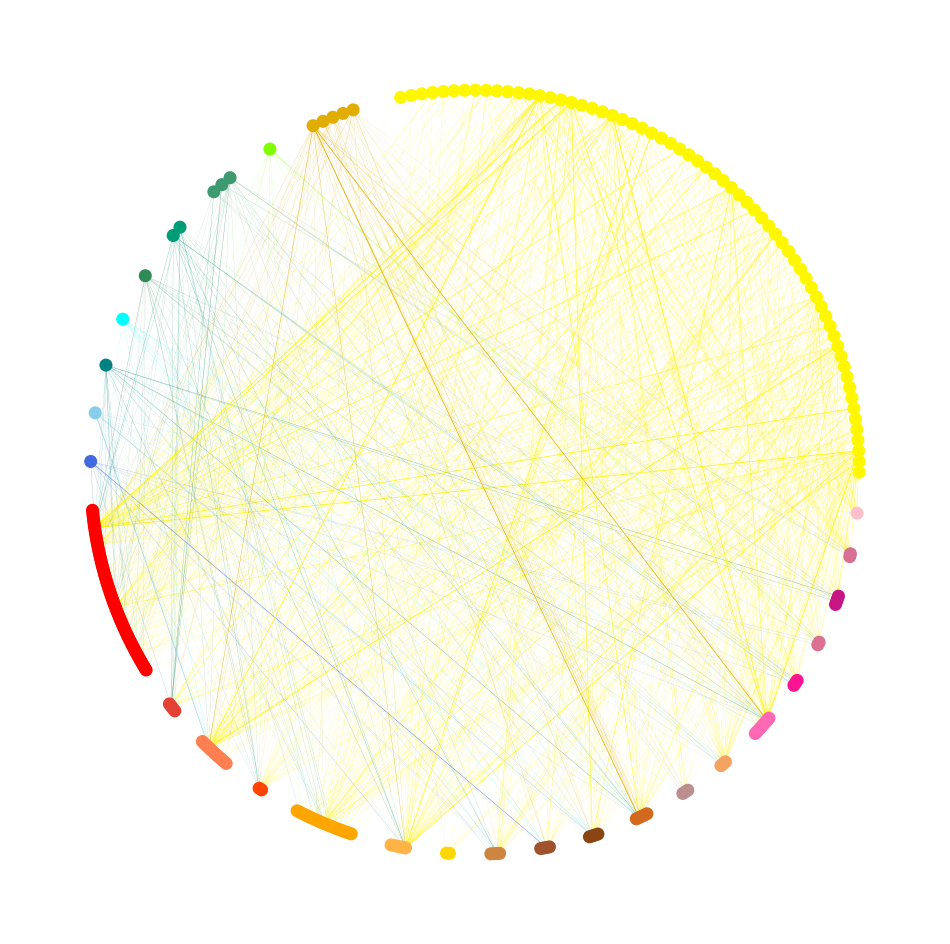

In [451]:
node_colors = []
for i in B.nodes:
    side, node = i.split('_')
    if side == 'user':
        cluster = model_dp_dc.user_clustering[int(node)]
        node_colors.append(colours_users[cluster])
    else:
        cluster = model_dp_dc.item_clustering[int(node)]
        node_colors.append(colours_items[cluster])

community_dict = {f"user_{i}": model_dp_dc.user_clustering[i] for i in range(num_users)}
community_dict.update({f"item_{j}": model_dp_dc.item_clustering[j] for j in range(num_items)})

# Optional: group nodes by community (sorted within partitions)
top_nodes_sorted = sorted(user_nodes, key=lambda x: community_dict[x])
bottom_nodes_sorted = sorted(item_nodes, key=lambda x: community_dict[x])

# Circle layout
n_top = len(top_nodes_sorted)
n_bottom = len(bottom_nodes_sorted)

theta_top = np.linspace(0, np.pi, n_top, endpoint=False)
theta_bottom = np.linspace(np.pi, 2*np.pi, n_bottom, endpoint=False)

fig, ax = plt.subplots(figsize=(12, 12))


pos_top = circular_partitioned_layout_with_wedges(
    top_nodes_sorted,
    community_dict,
    total_angle=np.pi,
    start_angle=0.0,
    gap=0.1,
    radius=1,
    ax=None,
    colors=colours_users,  # provide your user community colors here
    zorder=0
)

pos_bottom = circular_partitioned_layout_with_wedges(
    bottom_nodes_sorted,
    community_dict,
    total_angle=np.pi-0.2,
    start_angle=np.pi+0.1,
    gap=0.1,
    radius=1,
    ax=None,
    colors=colours_items,  # provide your item community colors here
    zorder=1
)

# Merge positions
pos = {**pos_top, **pos_bottom}

edge_weights_raw = [B[u][v]['weight'] for u, v in B.edges()]
min_w, max_w = min(edge_weights_raw), max(edge_weights_raw)

def scale_weight(w, min_w, max_w, min_width=0.05, max_width=0.5):
    # Avoid division by zero
    if max_w == min_w:
        return (min_width + max_width) / 2
    return min_width + (w - min_w) / (max_w - min_w) * (max_width - min_width)

edge_widths = [
    scale_weight(B[u][v]['weight'], min_w, max_w)
    for u, v in B.edges()
]


edge_colors = []
for u, v in B.edges():
    edge_colors.append(colours_users[community_dict[u]])
        
# Draw
# Draw the bipartite graph
nx.draw(B, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width = edge_widths, node_size=70)
# Add arcs for top (users) and bottom (items)
plt.show()

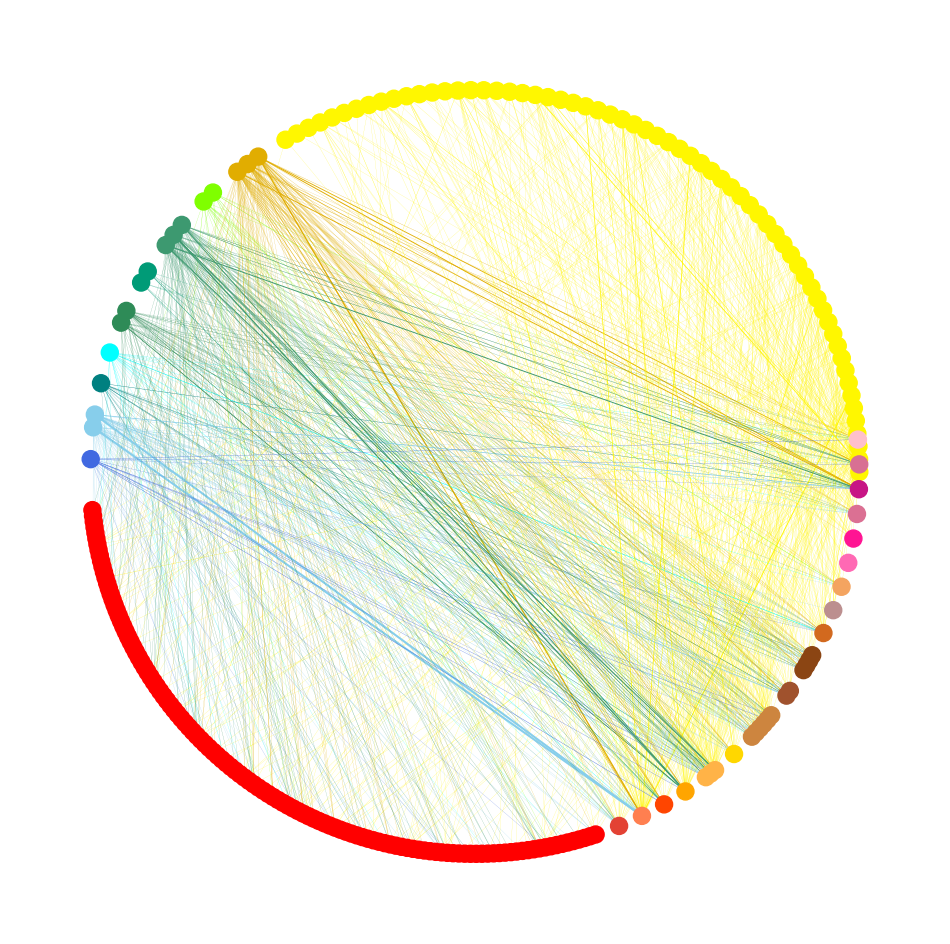

In [ ]:
node_colors = []
for i in B.nodes:
    side, node = i.split('_')
    if side == 'user':
        cluster = model_gn_esbm.user_clustering[int(node)]
        node_colors.append(colours_users[cluster])
    else:
        cluster = model_gn_esbm.item_clustering[int(node)]
        node_colors.append(colours_items[cluster])

community_dict = {f"user_{i}": model_gn_esbm.user_clustering[i] for i in range(num_users)}
community_dict.update({f"item_{j}": model_gn_esbm.item_clustering[j] for j in range(num_items)})

# Optional: group nodes by community (sorted within partitions)
top_nodes_sorted = sorted(user_nodes, key=lambda x: community_dict[x])
bottom_nodes_sorted = sorted(item_nodes, key=lambda x: community_dict[x])

# Circle layout
n_top = len(top_nodes_sorted)
n_bottom = len(bottom_nodes_sorted)

theta_top = np.linspace(0, np.pi, n_top, endpoint=False)
theta_bottom = np.linspace(np.pi, 2*np.pi, n_bottom, endpoint=False)

fig, ax = plt.subplots(figsize=(12, 12))

pos_top = circular_partitioned_layout_with_wedges(
    top_nodes_sorted,
    community_dict,
    total_angle=np.pi,
    start_angle=0.0,
    gap=0.05,
    radius=1,
    ax=None,
    colors=colours_users,  # provide your user community colors here
    zorder=0
)

pos_bottom = circular_partitioned_layout_with_wedges(
    bottom_nodes_sorted,
    community_dict,
    total_angle=np.pi,
    start_angle=np.pi+0.1,
    gap=0.05,
    radius=1,
    ax=None,
    colors=colours_items,  # provide your item community colors here
    zorder=1
)

# Merge positions
pos = {**pos_top, **pos_bottom}

edge_weights_raw = [B[u][v]['weight'] for u, v in B.edges()]
min_w, max_w = min(edge_weights_raw), max(edge_weights_raw)

def scale_weight(w, min_w, max_w, min_width=0.1, max_width=1.5):
    # Avoid division by zero
    if max_w == min_w:
        return (min_width + max_width) / 2
    return min_width + (w - min_w) / (max_w - min_w) * (max_width - min_width)

edge_widths = [
    scale_weight(B[u][v]['weight'], min_w, max_w)
    for u, v in B.edges()
]


edge_colors = []
for u, v in B.edges():
    edge_colors.append(colours_users[community_dict[u]])
        
# Draw
# Draw the bipartite graph
nx.draw(B, pos, with_labels=False, node_color=node_colors, edge_color=edge_colors, width = edge_widths, node_size=150)
# Add arcs for top (users) and bottom (items)
plt.show()

In [ ]:
model_gn_dc.user_clustering

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
id_to_name_rows = {i:dataset_clean.index[i] for i in range(len(dataset_clean.index))}
id_to_name_cols = {i:dataset_clean.columns[i] for i in range(len(dataset_clean.columns))}

In [ ]:
[
    [id_to_name_rows[i] for i in np.where(model_gn_dc.user_clustering == 0)[0]], 
    [id_to_name_rows[i] for i in np.where(model_gn_dc.user_clustering == 1)[0]],
    [id_to_name_rows[i] for i in np.where(model_gn_dc.user_clustering == 2)[0]],
    [id_to_name_rows[i] for i in np.where(model_gn_dc.user_clustering == 3)[0]],
    [id_to_name_rows[i] for i in np.where(model_gn_dc.user_clustering == 4)[0]],    
]

[['Allactaga elater',
  'Allactaga severtzovi',
  'Apodemus uralensis',
  'Blanfordimys afghanus',
  'Calomyscus mystax',
  'Cricetulus migratorius',
  'Dipus sagitta',
  'Eremodipus lichtensteini',
  'Meriones libycus',
  'Meriones meridianus',
  'Microtus socialis',
  'Microtus transcaspicus',
  'Nesokia indica',
  'Pygeretmus pumilio',
  'Rhombomys opimus',
  'Spermophilopsis leptodactylus',
  'Spermophilus fulvus'],
 [],
 [],
 [],
 []]

In [ ]:
(Y_train>0).sum()/Y_train.size

np.float64(0.3046757164404223)

In [ ]:
# Different shades of blue for clusters
colours_items = {
    0: '#08306b',   # dark blue
    1: '#08519c',   # strong blue
    2: '#2171b5',   # steel blue
    3: '#4292c6',   # medium blue
    4: '#6baed6',   # light blue
    5: '#9ecae1',   # lighter blue
    6: '#c6dbef',   # pale blue
    7: '#deebf7',   # very pale blue
    8: '#b3cde3',   # pastel blue
    9: '#6497b1',   # muted blue
    10: '#005b96',  # deep blue
    11: '#03396c'   # navy blue
}

# Different shades of red for clusters
colours_users = {
    0: '#8B0000',   # dark red
    1: '#B22222',   # firebrick
    2: '#DC143C',   # crimson
    3: '#FF0000',   # red
    4: '#FF6347',   # tomato
    5: '#FF7F50',   # coral
    6: '#CD5C5C',   # indian red
    7: '#F08080',   # light coral
    8: '#FA8072',   # salmon
    9: '#E9967A',   # dark salmon
    10: '#FFA07A',  # light salmon
    11: '#FFC1C1'   # rosy pink
}

In [ ]:
import networkx as nx
import plotly.graph_objects as go
import numpy as np

ratings = Y_train

num_users, num_items = ratings.shape

# Sample bipartite graph
B = nx.Graph()

# Add user and item nodes with bipartite attributes (optional but useful)
user_nodes = [f"user_{i}" for i in range(num_users)]
item_nodes = [f"item_{j}" for j in range(num_items)]

B.add_nodes_from(user_nodes, bipartite=0)
B.add_nodes_from(item_nodes, bipartite=1)

# Add edges for rated items
for i in range(num_users):
    for j in range(num_items):
        if ratings[i, j] > 0:
            B.add_edge(f"user_{i}", f"item_{j}", weight=ratings[i, j])

# Assign 3D positions manually
pos = {}
spacing = 100
for i, node in enumerate(user_nodes):
    pos[node] = [i * spacing, 0, 0]
for j, node in enumerate(item_nodes):
    pos[node] = [j * spacing, 0, 20]  # z=20 for second layer

# Color nodes by arbitrary community (mockup here)
# Different colors for users and items
node_colors = []
for i in B.nodes:
    side, node = i.split('_')
    if side == 'user':
        cluster = model_gn_dc.user_clustering[int(node)]
        node_colors.append(colours_users[cluster])
    else:
        cluster = model_gn_dc.item_clustering[int(node)]
        node_colors.append(colours_items[cluster])
        
edge_trace = []
for u, v in B.edges():
    x0, y0, z0 = pos[u]
    x1, y1, z1 = pos[v]
    edge_trace.append(go.Scatter3d(
        x=[x0, x1], y=[y0, y1], z=[z0, z1],
        mode='lines', line=dict(color='gray', width=2),
        hoverinfo='none'
    ))

node_trace = go.Scatter3d(
    x=[pos[n][0] for n in B.nodes()],
    y=[pos[n][1] for n in B.nodes()],
    z=[pos[n][2] for n in B.nodes()],
    mode='markers',
    marker=dict(size=10, color=node_colors),
    text=[n for n in B.nodes()],
    textposition='top center'
)

# fig = go.Figure(data=edge_trace + [node_trace])
# fig.update_layout(scene=dict(xaxis=dict(visible=False), yaxis=dict(visible=False), zaxis=dict(visible=False)))
# fig.show()

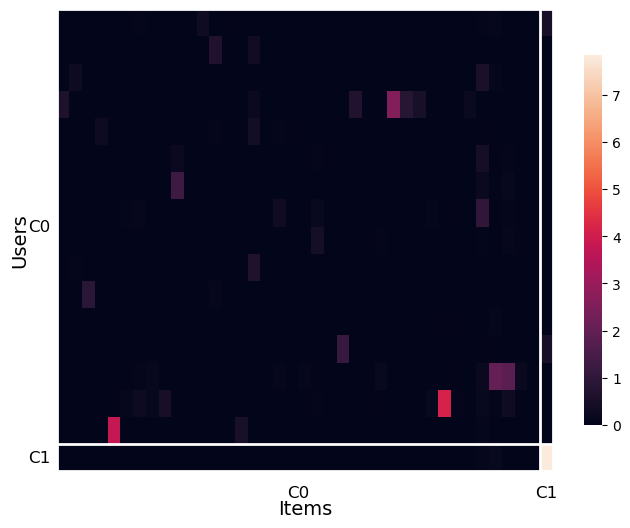

In [ ]:
plot_heatmap(model_dp_esbm, size=(8,6))

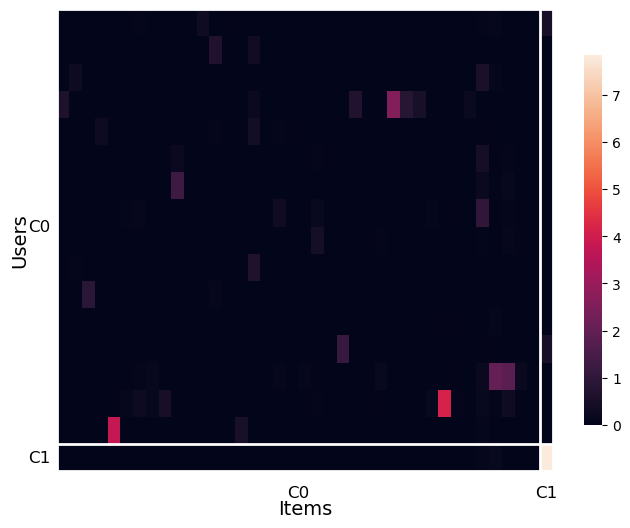

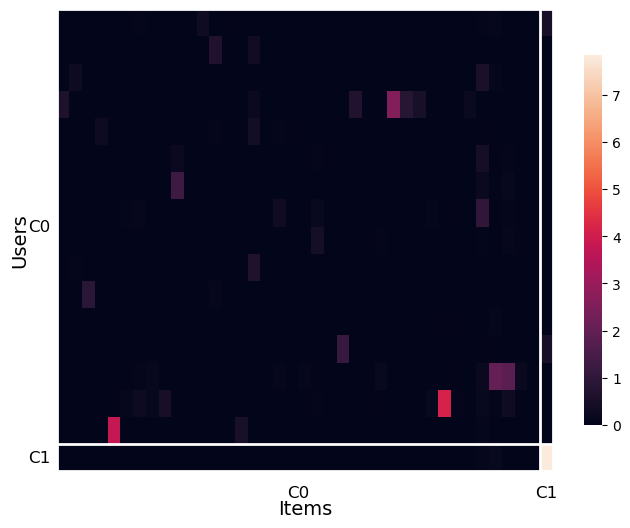

(None, None)

In [ ]:
plot_heatmap(model_dp_esbm, size=(8,6)), plot_heatmap(model_dp_dc, size=(8,6))

In [ ]:
mae_dp = model_dp.mae
mae_dp2 = model_dp2.mae
# mae_py = model_py.mae
# mae_gn = model_gn.mae
# mae_esbm = model_esbm.mae

mse_dp = model_dp.mse
mse_dp2 = model_dp2.mse
# mse_py = model_py.mse
# mse_gn = model_gn.mse
# mse_esbm = model_esbm.mse

waic_dp = model_dp.waic
# waic_py = model_py.waic
# waic_gn = model_gn.waic
# waic_esbm = model_esbm.waic

precision_dp = model_dp.precision_ranks
precision_dp2 = model_dp2.precision_ranks
# precision_py = model_py.precision_ranks
# precision_gn = model_gn.precision_ranks
# precision_esbm = model_esbm.precision_ranks

recall_dp = model_dp.recall_ranks
recall_dp2 = model_dp2.recall_ranks
# recall_py = model_py.recall_ranks
# recall_gn = model_gn.recall_ranks
# recall_esbm = model_esbm.recall_ranks

print('MAE:', mae_dp, mae_dp2)
print('MSE:', mse_dp, mse_dp2)
print('Precision:', precision_dp, precision_dp2)
print('Recall:', recall_dp, recall_dp2)

NameError: name 'model_dp' is not defined

In [ ]:
model_dp.n_clusters_items, model_dp.n_clusters_users, model_dp2.n_clusters_items, model_dp2.n_clusters_users

(4, 10, 4, 11)

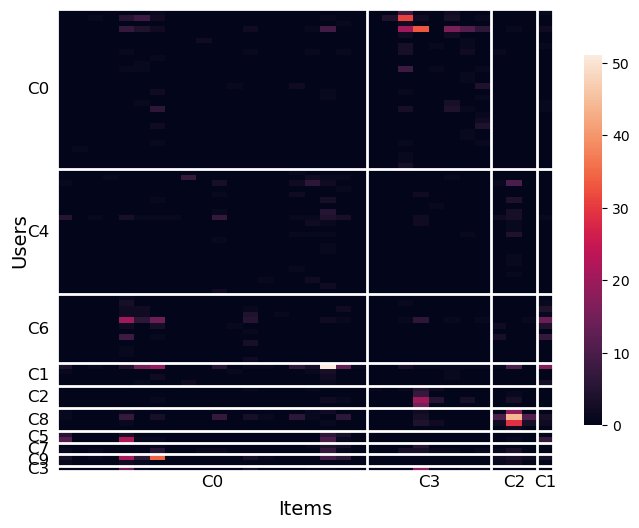

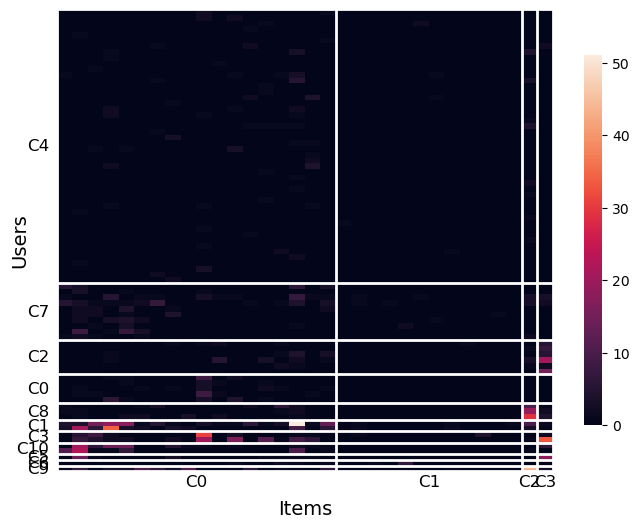

(None, None)

In [ ]:
plot_heatmap(model_dp, size=(8,6)), plot_heatmap(model_dp2, size=(8,6))#, plot_heatmap(model_gn, size=(8,6)), plot_heatmap(model_esbm, size=(8,6))

In [ ]:
def multiple_runs(data, nruns, 
                  param_list, model_list, model_names,
                  n_iters=1000, burn_in=0, thinning=1,
                  k = 10, size_val=0.2, verbose=0,
                  seed=0, print_intermid=False):
    
    data_out = []
    models_out = []
    for run in range(nruns):
        current_seed = run+seed
        Y_train, Y_val = generate_val_set(data, size=size_val, seed=current_seed, only_observed=False)
        data_out.append((Y_train, Y_val))
        out_models_dc = validate_models(Y_train.copy(), Y_val.copy(), 
                                        model_list, 
                                        param_list, 
                                        n_iters=n_iters, 
                                        burn_in=burn_in, 
                                        k = k, 
                                        verbose=verbose, 
                                        thinning=thinning, 
                                        model_names=model_names, 
                                        print_intermid=print_intermid)
        models_out.append(out_models_dc)
        print('Run', run, 'completed')
    return data_out, models_out

In [ ]:
data_out, models_out = multiple_runs(matrix_form, nruns=1,
                                    param_list=[params_dp, params_dp2],
                                    model_list=[dcesbm, dcesbm],
                                    model_names=['DP', 'DP2'],
                                    n_iters=500, burn_in=100, thinning=2,
                                    k = 10, size_val=0.2, verbose=0,
                                    seed=0, print_intermid=True)


Model name: DP
Starting training for model DP
starting log likelihood -22205.997287877217
end llk:  -2481.1305191439837
Starting waic computation DP
Starting prediction for model DP
Starting ranking for model DP
MAE: 0.08533156337757634
MSE: 0.6161404749829742
Precision: 0.048214285714285716
Recall: 0.22614795918367347

Model name: DP2
Starting training for model DP2
starting log likelihood -22205.997287877217
end llk:  -2172.536780798913
Starting waic computation DP2
Starting prediction for model DP2
Starting ranking for model DP2
MAE: 0.09117397598374417
MSE: 0.705757271567517
Precision: 0.05357142857142857
Recall: 0.24920525902668758
Run 0 completed


In [ ]:
model_dp = models_out[0][0]
y_val0 = data_out[0][1]

y_val_pairs = [(u,i) for u,i,_ in y_val0]

## Non dc model

In [ ]:
burn_in = 1000
thinning = 5
n_iters = 2000
k = 10

In [ ]:
params_baseline = {'cov_users':None,'cov_items':None, 'prior_a':1, 'prior_b':1, 'seed':42, 'scheme_param':1, 'bar_h_users':2, 'bar_h_items':3,
           'gamma':0.1, 'epsilon':1e-30, 'sigma':0.7, 'alpha_c':[1.5, 1.5, 1.5, 1.5]}

params_dp = params_baseline.copy()

params_dp['prior_a'] = 1
params_dp['prior_b'] = 1
params_dp['scheme_param'] = 0.5
params_dp['sigma'] = 0.5
params_dp['scheme_type'] = 'DP'


params_py = params_baseline.copy()
params_py['prior_a'] = 1
params_py['prior_b'] = 1
params_py['scheme_param'] = 1
params_py['sigma'] = 0.7
params_py['scheme_type'] = 'PY'

params_gn = params_baseline.copy()
params_gn['prior_a'] = 1
params_gn['prior_b'] = 1
params_gn['gamma'] = 0.9
params_gn['scheme_type'] = 'GN'

params_dp_cov = params_baseline.copy()
params_dp_cov['prior_a'] = 1
params_dp_cov['prior_b'] = 1
params_dp_cov['scheme_param'] = 0.5
params_dp_cov['cov_users'] = cov_users
params_dp_cov['cov_items'] = cov_items
params_dp_cov['scheme_type'] = 'DP'

params_gn_cov = params_baseline.copy()
params_gn_cov['prior_a'] = 1
params_gn_cov['prior_b'] = 1
params_gn_cov['gamma'] = 0.3
params_gn_cov['cov_users'] = cov_users
params_gn_cov['cov_items'] = cov_items
params_gn_cov['scheme_type'] = 'GN'

params_py_cov = params_baseline.copy()
params_py_cov['prior_a'] = 1
params_py_cov['prior_b'] = 1
params_py_cov['sigma'] = 0.7
params_py_cov['scheme_param'] = 0.5
params_py_cov['cov_users'] = cov_users
params_py_cov['cov_items'] = cov_items
params_py_cov['scheme_type'] = 'PY'

model_list = [esbm, esbm, esbm, esbm, esbm, esbm]
params_list = [params_dp, params_py, params_gn, params_dp_cov, params_py_cov, params_gn_cov]
model_names = ['DP', 'PY', 'GN', 'DP_cov', 'PY_cov', 'GN_cov']

In [ ]:
out_models = validate_models(Y_train, Y_val, model_list, params_list, n_iters=n_iters, burn_in=burn_in, k = k,
                                 thinning=thinning, model_names=model_names, true_users=true_users, true_items=true_items)


Model name: DP
Starting training for model DP
starting log likelihood -34232.09429665616
end llk:  -23781.1248436591
Starting waic computation DP
Starting prediction for model DP
Starting ranking for model DP

Model name: PY
Starting training for model PY
starting log likelihood -34232.09429665616
end llk:  -23826.251274828264
Starting waic computation PY
Starting prediction for model PY
Starting ranking for model PY

Model name: GN
Starting training for model GN
starting log likelihood -34232.09429665616
end llk:  -23839.11167367239
Starting waic computation GN
Starting prediction for model GN
Starting ranking for model GN

Model name: DP_cov
Starting training for model DP_cov
starting log likelihood -34232.09429665616
end llk:  -23820.938562184234
Starting waic computation DP_cov
Starting prediction for model DP_cov
Starting ranking for model DP_cov

Model name: PY_cov
Starting training for model PY_cov
starting log likelihood -34232.09429665616
end llk:  -23823.368440979342
Startin

In [ ]:
model_dp = out_models[0]
model_py = out_models[1]
model_gn = out_models[2]
model_dp_cov = out_models[3]
model_py_cov = out_models[4]
model_gn_cov = out_models[5]

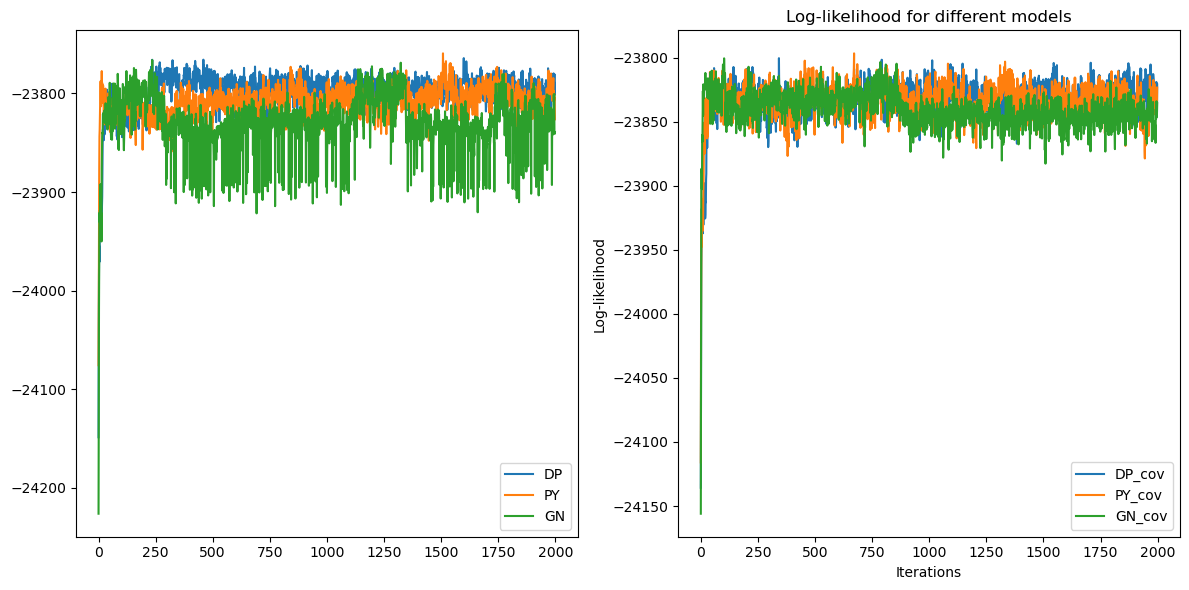

In [ ]:
llk_dp = out_models[0].train_llk
llk_py = out_models[1].train_llk
llk_gn = out_models[2].train_llk

llk_dp_cov = out_models[3].train_llk
llk_py_cov = out_models[4].train_llk
llk_gn_cov = out_models[5].train_llk

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(llk_dp[2:], label='DP')
ax[0].plot(llk_py[2:], label='PY')
ax[0].plot(llk_gn[2:], label='GN')
ax[0].legend()

ax[1].plot(llk_dp_cov[2:], label='DP_cov')
ax[1].plot(llk_py_cov[2:], label='PY_cov')
ax[1].plot(llk_gn_cov[2:], label='GN_cov')
ax[1].legend()

plt.title('Log-likelihood for different models')
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')

plt.tight_layout()
plt.show()

In [ ]:
vi_users_dp = model_dp.vi_users
vi_items_dp = model_dp.vi_items
vi_users_py = model_py.vi_users
vi_items_py = model_py.vi_items
vi_users_gn = model_gn.vi_users
vi_items_gn = model_gn.vi_items

vi_users_dp_cov = model_dp_cov.vi_users
vi_items_dp_cov = model_dp_cov.vi_items
vi_users_py_cov = model_py_cov.vi_users
vi_items_py_cov = model_py_cov.vi_items
vi_users_gn_cov = model_gn_cov.vi_users
vi_items_gn_cov = model_gn_cov.vi_items

mae_dp = model_dp.mae
mae_py = model_py.mae
mae_gn = model_gn.mae

mae_dp_cov = model_dp_cov.mae
mae_py_cov = model_py_cov.mae
mae_gn_cov = model_gn_cov.mae

mse_dp = model_dp.mse
mse_py = model_py.mse
mse_gn = model_gn.mse

mse_dp_cov = model_dp_cov.mse
mse_py_cov = model_py_cov.mse
mse_gn_cov = model_gn_cov.mse

waic_dp = model_dp.waic
waic_py = model_py.waic
waic_gn = model_gn.waic

waic_dp_cov = model_dp_cov.waic
waic_py_cov = model_py_cov.waic
waic_gn_cov = model_gn_cov.waic

precision_dp = model_dp.precision_ranks
precision_py = model_py.precision_ranks
precision_gn = model_gn.precision_ranks

precision_dp_cov = model_dp_cov.precision_ranks
precision_py_cov = model_py_cov.precision_ranks
precision_gn_cov = model_gn_cov.precision_ranks

recall_dp = model_dp.recall_ranks
recall_py = model_py.recall_ranks
recall_gn = model_gn.recall_ranks

recall_dp_cov = model_dp_cov.recall_ranks
recall_py_cov = model_py_cov.recall_ranks
recall_gn_cov = model_gn_cov.recall_ranks

In [ ]:
output_table2 = pd.DataFrame()

output_table2['VI users'] = [vi_users_dp, vi_users_py, vi_users_gn, vi_users_dp_cov, vi_users_py_cov, vi_users_gn_cov]
output_table2['VI items'] = [vi_items_dp, vi_items_py, vi_items_gn, vi_items_dp_cov, vi_items_py_cov, vi_items_gn_cov]
output_table2['MAE'] = [mae_dp, mae_py, mae_gn, mae_dp_cov, mae_py_cov, mae_gn_cov]
output_table2['MSE'] = [mse_dp, mse_py, mse_gn, mse_dp_cov, mse_py_cov, mse_gn_cov]
output_table2['WAIC'] = [waic_dp, waic_py, waic_gn, waic_dp_cov, waic_py_cov, waic_gn_cov]
output_table2['Precision'] = [precision_dp, precision_py, precision_gn, precision_dp_cov, precision_py_cov, precision_gn_cov]
output_table2['Recall'] = [recall_dp, recall_py, recall_gn, recall_dp_cov, recall_py_cov, recall_gn_cov]

output_table2.index = ['DP', 'PY', 'GN', 'DP_cov', 'PY_cov', 'GN_cov']
output_table2

In [ ]:
output_table2 = pd.DataFrame()

output_table2['VI users'] = [vi_users_dp, vi_users_py, vi_users_gn, vi_users_dp_cov, vi_users_py_cov, vi_users_gn_cov]
output_table2['VI items'] = [vi_items_dp, vi_items_py, vi_items_gn, vi_items_dp_cov, vi_items_py_cov, vi_items_gn_cov]
output_table2['MAE'] = [mae_dp, mae_py, mae_gn, mae_dp_cov, mae_py_cov, mae_gn_cov]
output_table2['MSE'] = [mse_dp, mse_py, mse_gn, mse_dp_cov, mse_py_cov, mse_gn_cov]
output_table2['WAIC'] = [waic_dp, waic_py, waic_gn, waic_dp_cov, waic_py_cov, waic_gn_cov]
output_table2['Precision'] = [precision_dp, precision_py, precision_gn, precision_dp_cov, precision_py_cov, precision_gn_cov]
output_table2['Recall'] = [recall_dp, recall_py, recall_gn, recall_dp_cov, recall_py_cov, recall_gn_cov]

output_table2.index = ['DP', 'PY', 'GN', 'DP_cov', 'PY_cov', 'GN_cov']
output_table2.round(4)

,VI users,VI items,MAE,MSE,WAIC,Precision,Recall
DP,1.5272,1.3090,0.4830,0.5483,3244.6705,0.4420,0.1110
PY,1.5556,1.3747,0.4825,0.5467,3167.1810,0.4440,0.1118
GN,1.3281,1.2508,0.4799,0.5450,3139.7548,0.4360,0.1100
DP_cov,1.2870,1.2180,0.4795,0.5455,3126.0909,0.4395,0.1106
PY_cov,1.3130,1.2282,0.4823,0.5492,3093.5000,0.4415,0.1108
GN_cov,1.2722,1.2031,0.4799,0.5442,3115.9858,0.4460,0.1126


In [ ]:
output_table.round(4)

,VI users,VI items,MAE,MSE,WAIC,Precision,Recall
DP,0.1885,0.0000,0.4720,0.5295,3456.0706,0.4440,0.1115
PY,0.3635,0.0752,0.4736,0.5308,3372.7282,0.4400,0.1106
GN,0.1686,0.0752,0.4748,0.5310,3419.8139,0.4445,0.1116
DP_cov,0.0652,0.0000,0.4752,0.5315,3334.8288,0.4435,0.1114
PY_cov,0.0652,0.0000,0.4724,0.5294,3425.9722,0.4445,0.1116
GN_cov,0.2844,0.0000,0.4745,0.5319,3339.8332,0.4435,0.1114


from the next cell it is clear that the issue of flat esbm is that it tends to cluster based on degree 

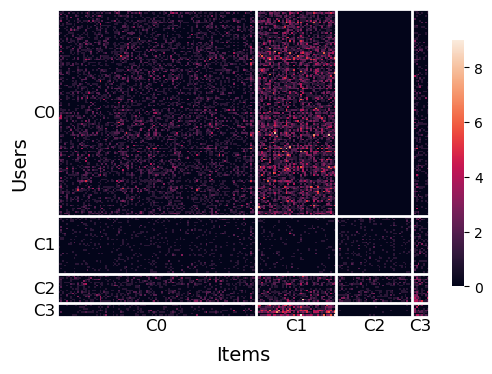

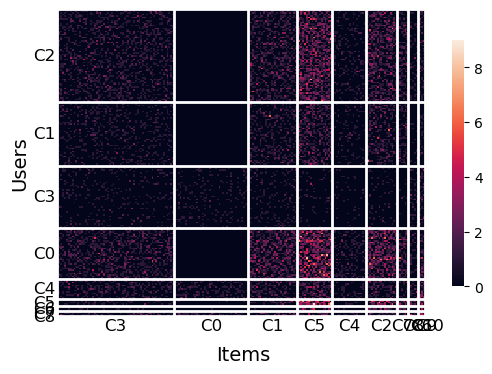

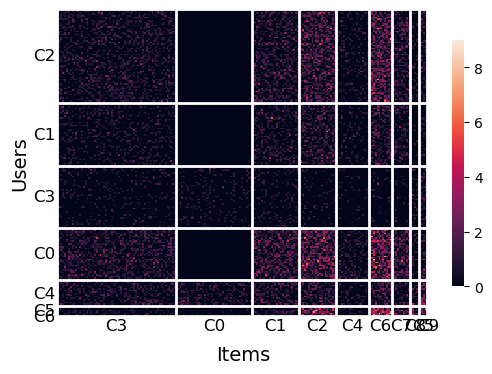

(None, None, None)

In [ ]:
plot_heatmap(model, size=(6,4)), plot_heatmap(model_py_cov, size=(6,4)), plot_heatmap(model_gn_cov, size=(6,4))

## other methods

In [ ]:
from sklearn.cluster import SpectralBiclustering, SpectralCoclustering
from sklearn.model_selection import GridSearchCV

spectral_bi = SpectralBiclustering(n_clusters=(5, 5), method='log', n_components=40, n_best=40)
spectral_bi.fit(Y_train)

SpectralBiclustering(method='log', n_best=40, n_clusters=(5, 5),
                     n_components=40)

In [ ]:
VI(model.user_clustering, relabel_clusters(spectral_bi.row_labels_)), VI(model.item_clustering, relabel_clusters(spectral_bi.column_labels_)) 

(array([1.73794648]), array([1.84691007]))

# past results

params_baseline = {'cov_users':None,'cov_items':None, 'prior_a':1, 'prior_b':1, 'seed':42, 'scheme_param':1, 'bar_h_users':2, 'bar_h_items':3,
           'gamma':0.1, 'epsilon':1e-30, 'sigma':0.7, 'alpha_c':[1.5, 1.5, 1.5, 1.5]}

params_dp = params_baseline.copy()

params_dp['prior_a'] = 1
params_dp['prior_b'] = 3.5
params_dp['degree_param_users'] = 2
params_dp['degree_param_items'] = 4
params_dp['scheme_param'] = 0.135
params_dp['sigma'] = 0.329
params_dp['scheme_type'] = 'DP'

params_py = params_baseline.copy()
params_py['prior_a'] = 1
params_py['prior_b'] = 3.5
params_py['degree_param_users'] = 1
params_py['degree_param_items'] = 15
params_py['scheme_param'] = 1.9
params_py['sigma'] = 0.7
params_py['scheme_type'] = 'PY'

params_gn = params_baseline.copy()
params_gn['prior_a'] = 1
params_gn['prior_b'] = 3.5
params_gn['degree_param_users'] = 15
params_gn['degree_param_items'] = 10
params_gn['gamma'] = 0.9
params_gn['scheme_type'] = 'GN'

params_dp_cov = params_baseline.copy()
params_dp_cov['prior_a'] = 0.7
params_dp_cov['prior_b'] = 3.5
params_dp_cov['degree_param_users'] = 16
params_dp_cov['degree_param_items'] = 11
params_dp_cov['scheme_param'] = 2
params_dp_cov['cov_users'] = cov_users
params_dp_cov['cov_items'] = cov_items
params_dp_cov['scheme_type'] = 'DP'

params_gn_cov = params_baseline.copy()
params_gn_cov['prior_a'] = 0.7
params_gn_cov['prior_b'] = 3.5
params_gn_cov['degree_param_users'] = 4
params_gn_cov['degree_param_items'] = 5
params_gn_cov['gamma'] = 0.3
params_gn_cov['cov_users'] = cov_users
params_gn_cov['cov_items'] = cov_items
params_gn_cov['scheme_type'] = 'GN'

params_py_cov = params_baseline.copy()
params_py_cov['prior_a'] = 0.7
params_py_cov['prior_b'] = 3.5
params_py_cov['degree_param_users'] = 4
params_py_cov['degree_param_items'] = 5
params_py_cov['sigma'] = 0.05
params_py_cov['scheme_param'] = 2
params_py_cov['cov_users'] = cov_users
params_py_cov['cov_items'] = cov_items
params_py_cov['scheme_type'] = 'PY'

model_list = [dcesbm, dcesbm, dcesbm, dcesbm, dcesbm, dcesbm]
params_list = [params_dp, params_py, params_gn, params_dp_cov, params_py_cov, params_gn_cov]
model_names = ['DP', 'PY', 'GN', 'DP_cov', 'PY_cov', 'GN_cov']

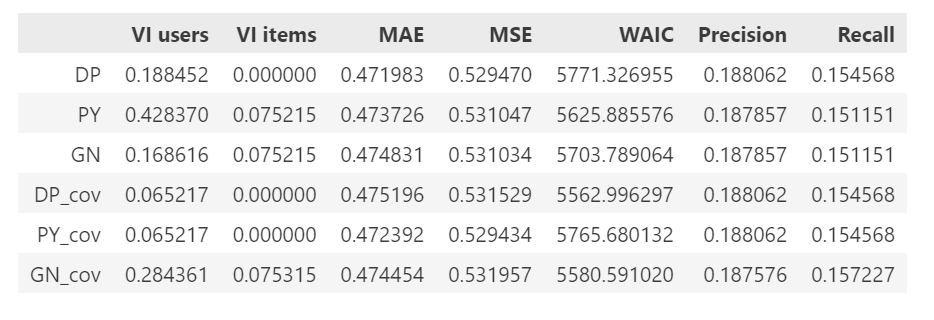
*data seed 1*

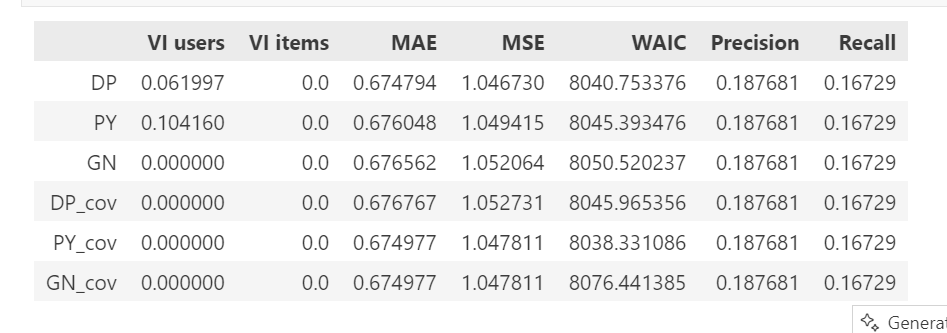
*data seed 42*